## Bibliotecas

- Matplotlib, Seaborn, ggplot, Bokeh, Plot.ly
    - Matplotlib: Library que é capaz de produzir uma grande variedade de gráficos, desde os mais simples até gráficos bastante complexo. O módulo mais usado é o pyplot que se possui uma interface baseada no Matlab.
    - Seaborn: Library que usa o Matplotlib por baixo. Utilizada para gerar gráficos estatísticos e possui uma boa integração com o Pandas.
    - ggplot: É uma library baseada na ggplot 2 da linguagem R. Alto nível.
    - Bokeh - Library de visualização que permite interação com os gráficos. Há dois tipos de interfaces

In [1]:
% matplotlib inline

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from ggplot import *

import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource

import plotly.plotly as py
import plotly.graph_objs as go

output_notebook()

/home/mobility/anaconda/envs/michael_env/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


Loading BokehJS ...

In [2]:
df1 = pd.DataFrame({'x':[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
                   'y':[8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]})
df2 = pd.DataFrame({'x':[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
                   'y':[9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]})
df3 = pd.DataFrame({'x':[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
                   'y':[7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]})
df4 = pd.DataFrame({'x':[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
                   'y':[6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]})

In [3]:
df = pd.concat([df1,df2,df3,df4], axis=1, 
               keys=list(map(lambda x: f'df{x}', range(1,5))))

In [4]:
df

df1          df2         df3          df4       
       x      y     x     y     x      y     x      y
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

In [5]:
f = lambda x: pd.Series({'media':np.round(x.mean(),1),'desv_pad':np.round(x.std(),1)})
pd.concat([df1.apply(f),df2.apply(f),df3.apply(f),df4.apply(f)],axis=1,
          keys=list(map(lambda x: f'df{x}', range(1,5))))

df1       df2       df3       df4     
            x    y    x    y    x    y    x    y
media     9.0  7.5  9.0  7.5  9.0  7.5  9.0  7.5
desv_pad  3.3  2.0  3.3  2.0  3.3  2.0  3.3  2.0

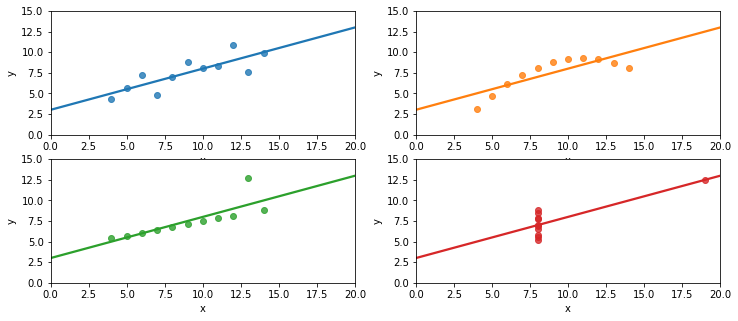

In [6]:
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(12,5))
range_x = [0,20]
range_y = [0,15]
axes[0][0].set_xlim(range_x);axes[0][0].set_ylim(range_y);axes[0][1].set_xlim(range_x),axes[0][1].set_ylim(range_y);axes[1][0].set_xlim(range_x);axes[1][0].set_ylim(range_y);axes[1][1].set_xlim(range_x);axes[1][1].set_ylim(range_y)
#seaborn
sns.regplot(x='x',y='y',data=df1,ci=None,ax=axes[0][0])
sns.regplot(x='x',y='y',data=df2,ci=None,ax=axes[0][1])
sns.regplot(x='x',y='y',data=df3,ci=None,ax=axes[1][0])
sns.regplot(x='x',y='y',data=df4,ci=None,ax=axes[1][1])


In [7]:
expvida = pd.read_csv("life_expectancy.csv",index_col=0)
expvida = expvida.drop(['Indicator Name', 'Indicator Code', 
                        'Country Code'],axis=1).dropna(axis=1,how='all')
expvida.dropna(axis=0, how='any', inplace=True)

In [8]:
expvida

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,68.784000,...,74.576000,74.725000,74.872000,75.016000,75.158000,75.299000,75.440000,75.582000,75.725000,75.867000
Afghanistan,32.292000,32.742000,33.185000,33.624000,34.060000,34.495000,34.928000,35.361000,35.796000,36.234000,...,59.694000,60.243000,60.754000,61.226000,61.666000,62.086000,62.494000,62.895000,63.288000,63.673000
Angola,33.251000,33.573000,33.914000,34.272000,34.645000,35.031000,35.426000,35.828000,36.234000,36.640000,...,55.096000,56.189000,57.231000,58.192000,59.042000,59.770000,60.373000,60.858000,61.241000,61.547000
Albania,62.279000,63.298000,64.187000,64.911000,65.461000,65.848000,66.108000,66.302000,66.485000,66.687000,...,75.656000,75.943000,76.281000,76.652000,77.031000,77.389000,77.702000,77.963000,78.174000,78.345000
Arab World,46.825065,47.407699,47.988878,48.572229,49.159167,49.744338,50.319000,50.876461,51.416870,51.945946,...,69.424552,69.646970,69.851434,70.041054,70.223894,70.408016,70.598298,70.793957,70.994541,71.198456
United Arab Emirates,52.265000,53.312000,54.349000,55.375000,56.385000,57.374000,58.330000,59.248000,60.120000,60.945000,...,75.828000,76.012000,76.183000,76.344000,76.498000,76.648000,76.798000,76.948000,77.101000,77.256000
Argentina,65.022000,65.141000,65.233000,65.311000,65.388000,65.481000,65.603000,65.760000,65.953000,66.184000,...,75.105000,75.268000,75.431000,75.595000,75.761000,75.926000,76.089000,76.252000,76.415000,76.577000
Armenia,65.971000,66.402000,66.837000,67.276000,67.715000,68.152000,68.587000,69.015000,69.425000,69.808000,...,72.815000,72.946000,73.119000,73.331000,73.571000,73.814000,74.044000,74.255000,74.445000,74.618000
Antigua and Barbuda,62.115000,62.555000,62.979000,63.385000,63.774000,64.148000,64.510000,64.864000,65.212000,65.557000,...,74.905000,75.078000,75.247000,75.412000,75.574000,75.733000,75.892000,76.050000,76.207000,76.364000


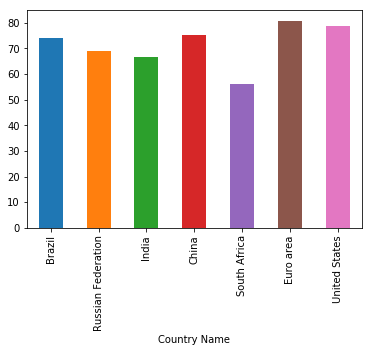

In [10]:
BRICS = ["Brazil", "Russian Federation","India", 'China', 'South Africa', 'Euro area', 'United States']
expvida.loc[BRICS,'2010'].plot.bar()

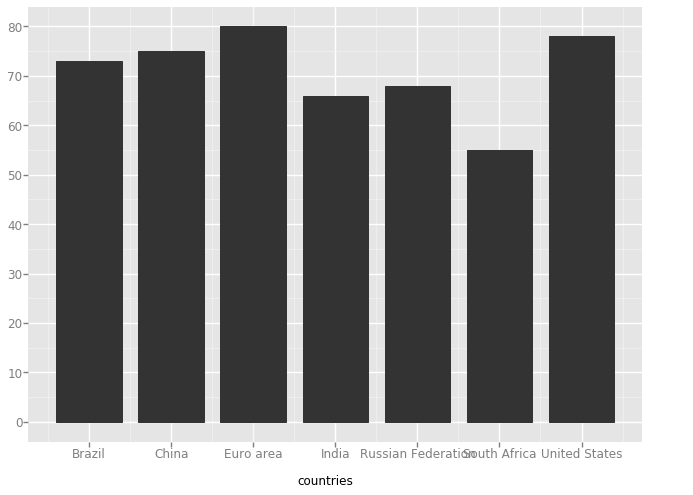

<ggplot: (-9223363276228544382)>

In [12]:
data = expvida.loc[BRICS,'2010']
data = pd.DataFrame({'countries':data.index,'values':data.values.astype(int)})
ggplot(aes(x='countries',  weight='values'), data=data) + \
    geom_bar()

In [11]:
source = ColumnDataSource(data)
p = figure(x_range=data['countries'].values, plot_height=350, title="Countries")
p.vbar(x='countries', 
       bottom=0, top='values', source=source,
       width=0.9, legend="countries",
       fill_color=factor_cmap('countries',palette=Spectral6, factors=data['countries'].values))
show(p)

/home/mobility/anaconda/envs/michael_env/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning:

Palette length does not match number of factors. ['United States'] will be assigned to `nan_color` gray



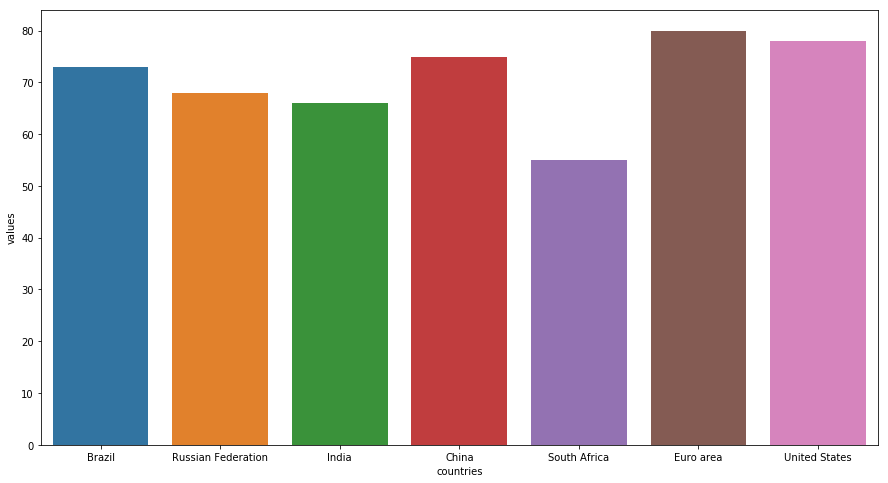

In [13]:
sns.set()

plt.figure(figsize=(15,8))
sns.barplot(x='countries', y='values', data=data)

In [13]:
data['countries'].values

array(['Brazil', 'Russian Federation', 'India', 'China', 'South Africa',
       'Euro area', 'United States'], dtype=object)

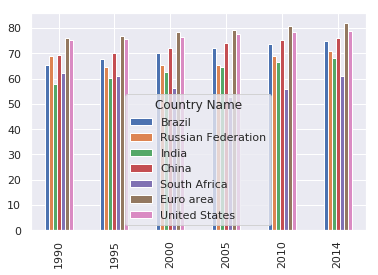

In [14]:
## matplotlib with seaborn
expvida.loc[BRICS,['1990','1995','2000','2005','2010','2014']].T.plot.bar()

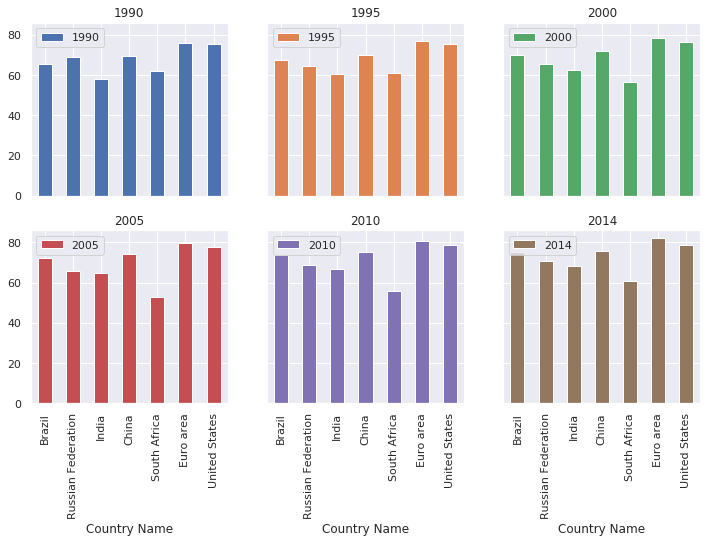

In [15]:
expvida.loc[BRICS,['1990','1995','2000','2005','2010','2014']].plot.bar(subplots=True,
                                                                    layout=(2,3),
                                                                    sharey=True,
                                                                   figsize=(12,7));

## Histograma

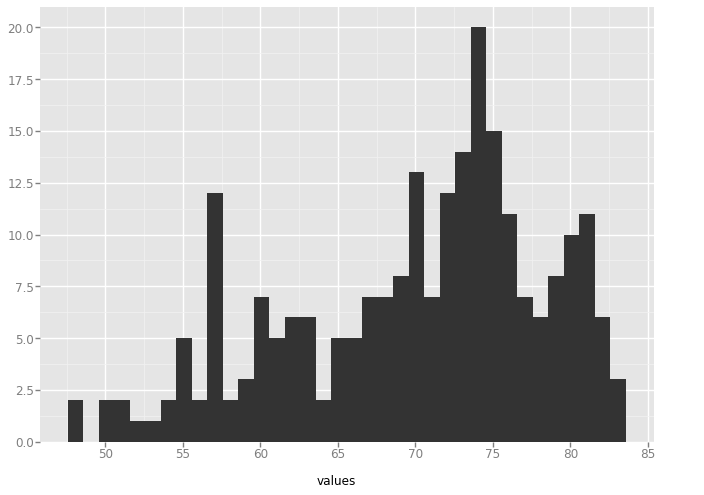

<ggplot: (8760626146652)>

In [15]:
data = pd.DataFrame({'countries':expvida['2010'].index,'values':expvida['2010'].values})
ggplot(aes(x='values'), data=data)+\
    geom_histogram(binwidth=1)


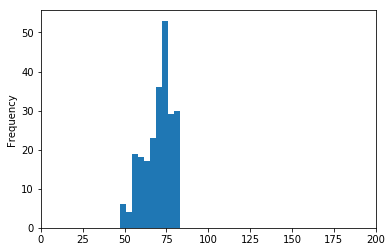

In [20]:
fig, ax = plt.subplots()
ax.set_xlim([0,200])
expvida['2010'].plot.hist(bins=10);

In [21]:
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of countries',
          x_axis_label = 'a', 
           y_axis_label = 'b')

In [22]:
hist, edges = np.histogram(expvida['2010'].values)

In [25]:
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], alpha=0.4)
show(p)

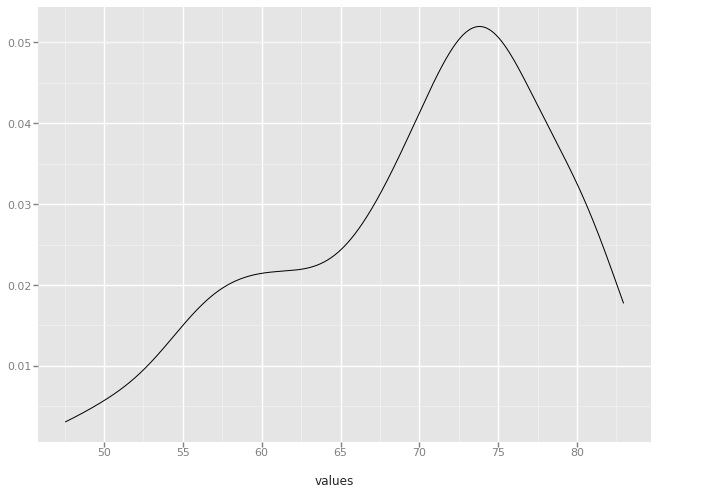

<ggplot: (8790470870918)>


In [21]:
data = pd.DataFrame({'countries':expvida['2010'].index,'values':expvida['2010'].values})
ggp = ggplot(aes(x='values'), data=data)+\
    geom_density()
print(ggp)

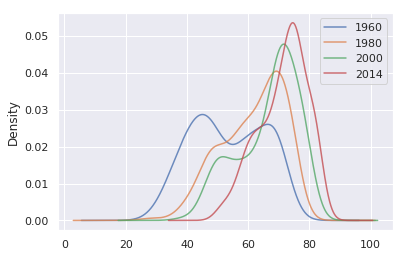

In [22]:
expvida[['1960','1980','2000','2014']].plot.density(alpha=.8)

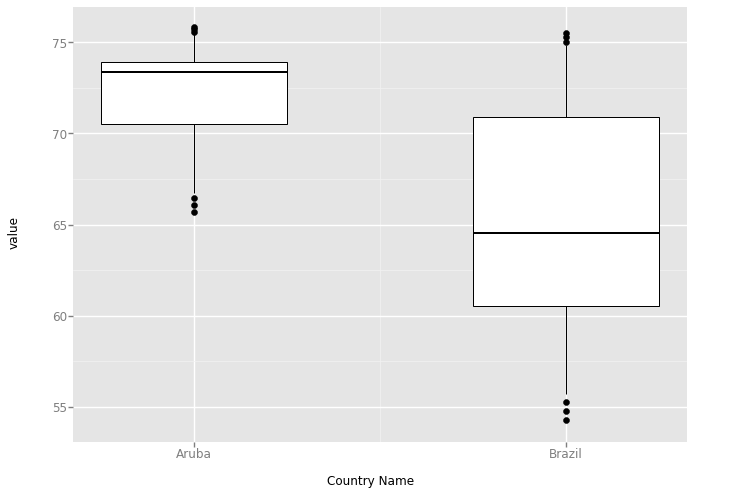

<ggplot: (8760544341610)>


In [30]:
# data = pd.DataFrame({'country':np.repeat('a',len(expvida['2000'])),'values':expvida['2000'].values})
df = pd.melt(expvida.reset_index(),id_vars='Country Name')
ggp = ggplot(aes(x='Country Name',y='value'), data=df[(df['Country Name']=='Aruba') | (df['Country Name']=='Brazil')])+\
    geom_boxplot()
print(ggp)

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb0e2d74e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb0c5cf2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb0e2d7cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7feb0c5cfb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feb0c5daa20>],
 'means': []}

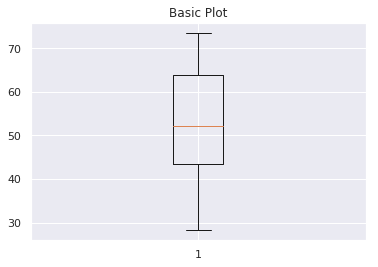

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(expvida['1960'])

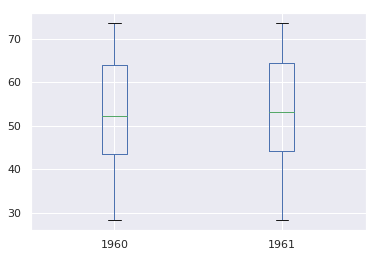

In [25]:
expvida.boxplot(['1960','1961'])

In [31]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                    'C': {0: 2, 1: 4, 2: 6}})

In [32]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [33]:
df1=pd.melt(df, id_vars=['A'], value_vars=['B'])

In [34]:
df1

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [36]:
# df = pd.melt(expvida.reset_index(),id_vars='Country Name')

In [37]:
# df

,Country Name,variable,value
0,Aruba,1960,65.662000
1,Afghanistan,1960,32.292000
2,Angola,1960,33.251000
3,Albania,1960,62.279000
4,Arab World,1960,46.825065
5,United Arab Emirates,1960,52.265000
6,Argentina,1960,65.022000
7,Armenia,1960,65.971000
8,Antigua and Barbuda,1960,62.115000
9,Australia,1960,70.817073


## Holoviews, bokeh

In [43]:
expv = pd.melt(expvida.reset_index(),id_vars='Country Name')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
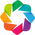

In [44]:
import holoviews as hv
from holoviews import opts
from bokeh.palettes import Set1_7, RdBu5, RdBu11

hv.extension('bokeh')

In [45]:
BRICS = ["Brazil", "Russian Federation","India", 'China', 
         'South Africa', 'Euro area', 'United States']

In [52]:
%%opts Bars [height=500, width=700, xrotation=90, show_legend=False,tools=['hover']] (color=Cycle(Set1_7))

dados = expv[(expv['Country Name'].isin(BRICS))&(expv['variable'].isin(['1990','1995','2000','2005','2010','2014']))]

bar = hv.Bars(dados,kdims=['Country Name', 'variable'], vdims='value')


In [53]:
bar.sort(by='Country Name')

:Bars   [Country Name,variable]   (value)

In [55]:
%%opts Bars [height=500, width=700, xrotation=90, show_legend=False,tools=['hover']] (color=Cycle(Set1_7)) 

dados = expv[expv['Country Name'].isin(BRICS)].copy()
bar = hv.Bars(dados,kdims=['Country Name','variable'],vdims='value')
bar.aggregate('Country Name',function=np.med)

:Bars   [Country Name]   (value)

In [59]:
%%output size=120
%%opts Histogram [show_legend=True] (color=Cycle(Set1_7), fill_alpha=0.6)
ds = hv.Dataset(expv, kdims=['Country Name','variable'], vdims='value')
ds.select(variable=['1960','2014']).hist(dimension='value',groupby='variable',adjoin=False)

:NdOverlay   [variable]
   :Histogram   [value]   (value_frequency)

In [127]:
%%opts BoxWhisker [height=500, width=700,xrotation=90, show_legend=False, tools=['hover']] (box_color='#0067A9',box_fill_alpha=0.4)
dados = expv[expv['Country Name'].isin(BRICS)].copy()
boxplot_ev = hv.BoxWhisker(dados,kdims=['Country Name'],vdims='value')

In [128]:
boxplot_ev

:BoxWhisker   [Country Name]   (value)

In [60]:
%%output size=120
%%opts Curve [width=600,height=400,xrotation=90]
dados = expv[expv['Country Name'].isin(BRICS[:-2])].copy()
curve = hv.Curve(dados.rename(columns={'variable':'anos','value':'expectativa de vida'})
                 ,kdims=['anos'],vdims=['expectativa de vida', 'Country Name']).groupby('Country Name')


In [61]:
curve

:HoloMap   [Country Name]
   :Curve   [anos]   (expectativa de vida,Country Name)